### Test Notebook for Marketing Dashboard: FB Page Analysis Skooldio

---

In [185]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import re

In [186]:
# Please change name of dataset to sample before run code
df = pd.read_csv('sample.csv')
df

,Post time,Caption,Content type,Reach,Likes and reactions,Sticker taps,Replies,Post Clicks,Comments,Shares,Results,Cost per result
0,2022-07-18 7:01:00,🎉 อัปเดททักษะผู้นำยุคใหม่ให้ทันทุกการเปลี่ยนแ...,Facebook post,1774.0,5.0,NaN,NaN,5.0,0.0,1.0,NaN,NaN
1,2022-07-18 5:17:04,👨‍⚖️ ออกแบบเว็บไซต์ยังไงให้ถูกต้องตามหลัก PDPA...,Facebook post,24510.0,341.0,NaN,NaN,1396.0,7.0,357.0,NaN,NaN
2,2022-07-17 7:11:30,Google Sheets วิธีตรวจสอบ Email ที่ถูกต้องง่าย...,Facebook post,2559.0,35.0,NaN,NaN,160.0,0.0,15.0,NaN,NaN
3,2022-07-16 5:34:02,🔵 🔴 🟡 🟢 #เรียนสายไหนมาก็อัปสกิลได้ เปลี่ยนคุณเ...,Facebook post,47897.0,198.0,NaN,NaN,1135.0,0.0,341.0,NaN,NaN
4,2022-07-15 3:30:02,🧐 เฉลยเทคนิค! ซื้อคอร์ส Skooldio วันไหนคุ้มสุด...,Facebook post,2250.0,3.0,NaN,NaN,11.0,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
547,2022-01-03 18:27:00,🚀 #HarvardBusinessReview ปี 2022 ใครเรียนรู้เร...,Facebook post,35409.0,87.0,NaN,NaN,88.0,0.0,36.0,NaN,NaN
548,2022-01-03 5:41:02,#ทำได้ใน1นาที คำนวณวันทำงานง่าย ๆ ไม่ต้องมานั่...,Facebook post,288256.0,7022.0,NaN,NaN,17206.0,74.0,2492.0,NaN,NaN
549,2022-01-02 5:41:00,🎨 สาย Design ห้ามพลาด! แนะนำเว็บเลือกสีทำงานออ...,Facebook post,133251.0,2378.0,NaN,NaN,6283.0,66.0,1929.0,NaN,NaN
550,2022-01-01 22:15:19,🌍 ในยุคที่หลายๆ องค์กรพยายามจะปรับตัวเองให้เป็...,Facebook post,44527.0,108.0,NaN,NaN,176.0,1.0,63.0,NaN,NaN


In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 552 entries, 0 to 551
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Post time            552 non-null    object 
 1   Caption              552 non-null    object 
 2   Content type         552 non-null    object 
 3   Reach                547 non-null    float64
 4   Likes and reactions  539 non-null    float64
 5   Sticker taps         0 non-null      float64
 6   Replies              0 non-null      float64
 7   Post Clicks          539 non-null    float64
 8   Comments             539 non-null    float64
 9   Shares               539 non-null    float64
 10  Results              0 non-null      float64
 11  Cost per result      0 non-null      float64
dtypes: float64(9), object(3)
memory usage: 51.9+ KB


In [188]:
df.shape

(552, 12)

In [189]:
df.isnull().sum()

Post time                0
Caption                  0
Content type             0
Reach                    5
Likes and reactions     13
Sticker taps           552
Replies                552
Post Clicks             13
Comments                13
Shares                  13
Results                552
Cost per result        552
dtype: int64

In [190]:
# Drop unnecessary columns
df.drop(columns=['Sticker taps', 'Content type', 'Replies', 'Results', 'Cost per result'], inplace=True)
df.head()

,Post time,Caption,Reach,Likes and reactions,Post Clicks,Comments,Shares
0,2022-07-18 7:01:00,🎉 อัปเดททักษะผู้นำยุคใหม่ให้ทันทุกการเปลี่ยนแ...,1774.0,5.0,5.0,0.0,1.0
1,2022-07-18 5:17:04,👨‍⚖️ ออกแบบเว็บไซต์ยังไงให้ถูกต้องตามหลัก PDPA...,24510.0,341.0,1396.0,7.0,357.0
2,2022-07-17 7:11:30,Google Sheets วิธีตรวจสอบ Email ที่ถูกต้องง่าย...,2559.0,35.0,160.0,0.0,15.0
3,2022-07-16 5:34:02,🔵 🔴 🟡 🟢 #เรียนสายไหนมาก็อัปสกิลได้ เปลี่ยนคุณเ...,47897.0,198.0,1135.0,0.0,341.0
4,2022-07-15 3:30:02,🧐 เฉลยเทคนิค! ซื้อคอร์ส Skooldio วันไหนคุ้มสุด...,2250.0,3.0,11.0,0.0,0.0


In [191]:
# Change to Datetime format to be able to analyze data trends
df['Post time'] = pd.to_datetime(df['Post time'])

In [206]:
# Exclude change cover post
df = df.loc[df['Caption'] != 'Skooldio updated their cover photo.'].reset_index(drop=True)

<AxesSubplot:>

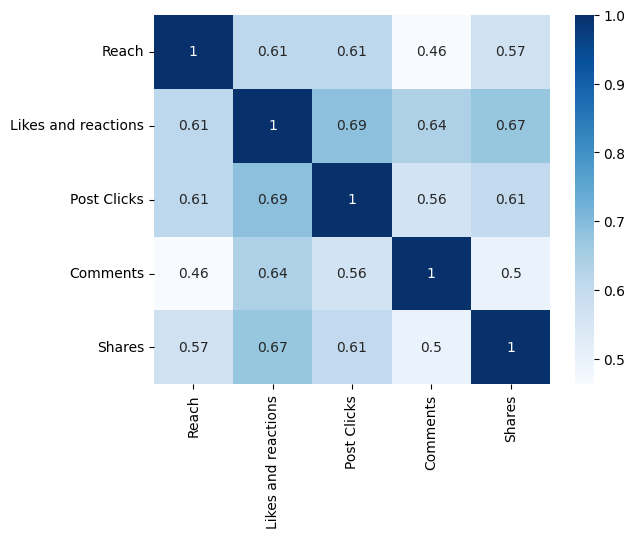

In [193]:
# Inspect correlation between variables
data_temp = df.corr(method='kendall')
sns.heatmap(data_temp, cmap='Blues', annot=True)

In [194]:
# Prepare available columns to get tags in caption
df['tags'] = np.array([np.nan]*df.shape[0])
df

,Post time,Caption,Reach,Likes and reactions,Post Clicks,Comments,Shares,tags
0,2022-07-18 07:01:00,🎉 อัปเดททักษะผู้นำยุคใหม่ให้ทันทุกการเปลี่ยนแ...,1774.0,5.0,5.0,0.0,1.0,NaN
1,2022-07-18 05:17:04,👨‍⚖️ ออกแบบเว็บไซต์ยังไงให้ถูกต้องตามหลัก PDPA...,24510.0,341.0,1396.0,7.0,357.0,NaN
2,2022-07-17 07:11:30,Google Sheets วิธีตรวจสอบ Email ที่ถูกต้องง่าย...,2559.0,35.0,160.0,0.0,15.0,NaN
3,2022-07-16 05:34:02,🔵 🔴 🟡 🟢 #เรียนสายไหนมาก็อัปสกิลได้ เปลี่ยนคุณเ...,47897.0,198.0,1135.0,0.0,341.0,NaN
4,2022-07-15 03:30:02,🧐 เฉลยเทคนิค! ซื้อคอร์ส Skooldio วันไหนคุ้มสุด...,2250.0,3.0,11.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...
542,2022-01-03 18:27:00,🚀 #HarvardBusinessReview ปี 2022 ใครเรียนรู้เร...,35409.0,87.0,88.0,0.0,36.0,NaN
543,2022-01-03 05:41:02,#ทำได้ใน1นาที คำนวณวันทำงานง่าย ๆ ไม่ต้องมานั่...,288256.0,7022.0,17206.0,74.0,2492.0,NaN
544,2022-01-02 05:41:00,🎨 สาย Design ห้ามพลาด! แนะนำเว็บเลือกสีทำงานออ...,133251.0,2378.0,6283.0,66.0,1929.0,NaN
545,2022-01-01 22:15:19,🌍 ในยุคที่หลายๆ องค์กรพยายามจะปรับตัวเองให้เป็...,44527.0,108.0,176.0,1.0,63.0,NaN


In [195]:
# Extract all "English" Tags to tags column
pattern = re.compile('#[a-zA-Z0-9]+[\w$]')

for index, row in df.iterrows():
    result = pattern.findall(df['Caption'][index])
    lower_result = [e.lower() for e in result]
    df['tags'][index] = lower_result

df

C:\Users\HP\AppData\Local\Temp\ipykernel_10252\3417935168.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tags'][index] = lower_result


,Post time,Caption,Reach,Likes and reactions,Post Clicks,Comments,Shares,tags
0,2022-07-18 07:01:00,🎉 อัปเดททักษะผู้นำยุคใหม่ให้ทันทุกการเปลี่ยนแ...,1774.0,5.0,5.0,0.0,1.0,"[#digitalleadershipbootcamp, #dlb3, #dlbbyskoo..."
1,2022-07-18 05:17:04,👨‍⚖️ ออกแบบเว็บไซต์ยังไงให้ถูกต้องตามหลัก PDPA...,24510.0,341.0,1396.0,7.0,357.0,[]
2,2022-07-17 07:11:30,Google Sheets วิธีตรวจสอบ Email ที่ถูกต้องง่าย...,2559.0,35.0,160.0,0.0,15.0,[]
3,2022-07-16 05:34:02,🔵 🔴 🟡 🟢 #เรียนสายไหนมาก็อัปสกิลได้ เปลี่ยนคุณเ...,47897.0,198.0,1135.0,0.0,341.0,[]
4,2022-07-15 03:30:02,🧐 เฉลยเทคนิค! ซื้อคอร์ส Skooldio วันไหนคุ้มสุด...,2250.0,3.0,11.0,0.0,0.0,"[#lineshoppingth, #upskillwithskooldio]"
...,...,...,...,...,...,...,...,...
542,2022-01-03 18:27:00,🚀 #HarvardBusinessReview ปี 2022 ใครเรียนรู้เร...,35409.0,87.0,88.0,0.0,36.0,[#harvardbusinessreview]
543,2022-01-03 05:41:02,#ทำได้ใน1นาที คำนวณวันทำงานง่าย ๆ ไม่ต้องมานั่...,288256.0,7022.0,17206.0,74.0,2492.0,[]
544,2022-01-02 05:41:00,🎨 สาย Design ห้ามพลาด! แนะนำเว็บเลือกสีทำงานออ...,133251.0,2378.0,6283.0,66.0,1929.0,[]
545,2022-01-01 22:15:19,🌍 ในยุคที่หลายๆ องค์กรพยายามจะปรับตัวเองให้เป็...,44527.0,108.0,176.0,1.0,63.0,"[#skooldio, #sql, #dataanalytics]"


In [196]:
from collections import Counter
from itertools import chain
pd.Series(Counter(chain(*df.tags))).sort_values(ascending=False)

#upskillwithskooldio      253
#skooldio                 244
#skooldiolive              30
#appsheet                  23
#kotlin                    22
                         ... 
#softwareengineer           1
#makebykbank                1
#operation                  1
#spreadsheet                1
#harvardbusinessreview      1
Length: 242, dtype: int64

Text(0, 0.5, 'Normalized Values')

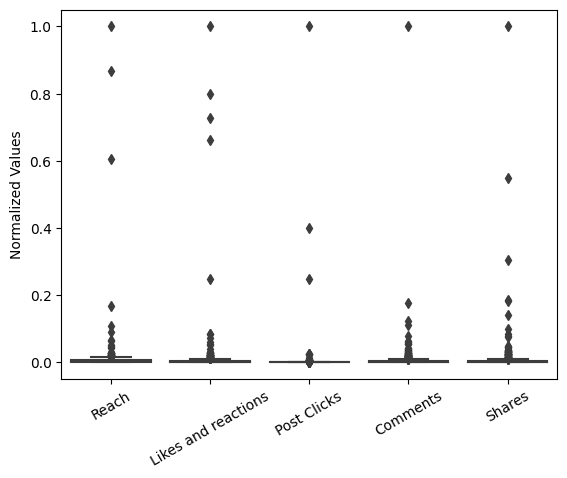

In [197]:
# Check outliers
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()

df_box = df[['Reach', 'Likes and reactions', 'Post Clicks', 'Comments', 'Shares']]
df_box_scaled = pd.DataFrame(min_max_scaler.fit_transform(df_box))
df_box_scaled.columns = ['Reach', 'Likes and reactions', 'Post Clicks', 'Comments', 'Shares']
df_box_scaled

sns.boxplot(data=df_box_scaled, palette='Paired')
plt.xticks(rotation=30)
plt.ylabel('Normalized Values')

In [198]:
df.describe()

,Reach,Likes and reactions,Post Clicks,Comments,Shares
count,5.470000e+02,534.000000,534.000000,534.000000,534.000000
mean,3.072849e+04,318.498127,2857.707865,14.692884,130.417603
std,1.689525e+05,1989.145054,33854.370914,91.951631,722.066614
min,8.000000e+00,1.000000,0.000000,0.000000,0.000000
25%,6.034500e+03,24.250000,72.000000,0.000000,7.000000
50%,1.078100e+04,56.000000,186.500000,1.000000,21.500000
75%,2.000450e+04,145.250000,596.250000,9.000000,63.750000
max,2.693976e+06,28192.000000,708446.000000,2033.000000,13587.000000


<AxesSubplot:>

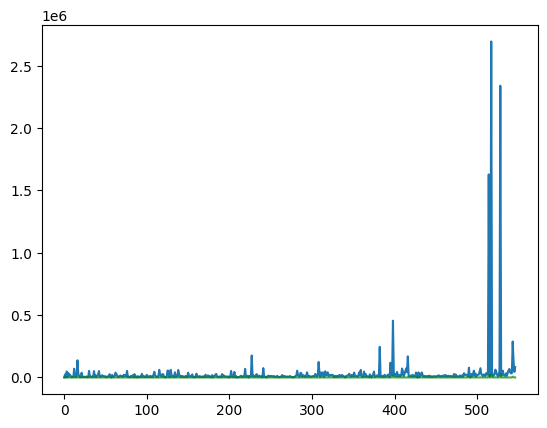

In [199]:
df['Reach'].plot(x='Post time')
df['Likes and reactions'].plot(x='Post time', color='green', alpha=0.7)

In [200]:
df.sort_values(by='Reach', ascending=False)

,Post time,Caption,Reach,Likes and reactions,Post Clicks,Comments,Shares,tags
517,2022-01-14 05:41:02,😍 #ทำได้ใน1นาที วิธีไฮไลต์ชื่อซ้ำใน #GoogleShe...,2693976.0,22528.0,175675.0,250.0,13587.0,[#googlesheets]
528,2022-01-10 05:41:00,😍 #ทำได้ใน1นาที 📊 #GoogleSheets วิธีเปลี่ยนอัก...,2338971.0,28192.0,708446.0,131.0,4128.0,[#googlesheets]
514,2022-01-16 05:41:02,😍 #ทำได้ใน1นาที 📊 #GoogleSheets วิธีรวมชื่อกับ...,1628018.0,20513.0,283886.0,157.0,7458.0,[#googlesheets]
398,2022-03-11 19:41:01,จุดแข็ง : ชอบพัฒนาตัวเอง สมัครเรียนไว้หลายคอร์...,455191.0,18624.0,17962.0,2033.0,2530.0,[]
543,2022-01-03 05:41:02,#ทำได้ใน1นาที คำนวณวันทำงานง่าย ๆ ไม่ต้องมานั่...,288256.0,7022.0,17206.0,74.0,2492.0,[]
...,...,...,...,...,...,...,...,...
372,2022-03-22 06:23:14,Skooldio Live : มนุษย์กลายพันธุ์ Ep.1 - เส้นทา...,1267.0,NaN,NaN,NaN,NaN,[]
209,2022-05-23 19:46:31,ถ้าอยากเป็น Data Scientist ต้องพัฒนาตัวเองยังไ...,998.0,1.0,7.0,0.0,0.0,[#upskillwithskooldio]
223,2022-05-17 22:31:50,"Be in Demand EP.2 : เปิดเส้นทางสายอาชีพ ""นักพั...",921.0,NaN,NaN,NaN,NaN,[]
200,2022-05-25 22:02:01,【 🔴 Live 】1 ทุ่มตรงวันนี้ มาเจาะลึกเบื้องหลังแ...,783.0,33.0,74.0,2.0,11.0,"[#skooldiolive, #becoming, #upskillwithskooldio]"


In [201]:
# Remove Outliers (Boost / Ads Post)
# Outliers 
# df[~(np.abs(df.Reach-df.Reach.mean()) <= (3*df.Reach.std()))]
df = df[(np.abs(df.Reach-df.Reach.mean()) <= (3*df.Reach.std()))]

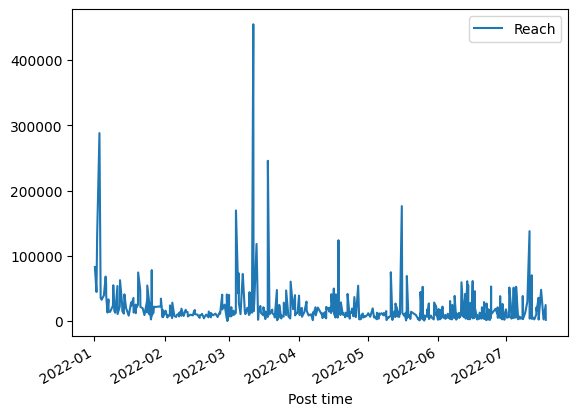

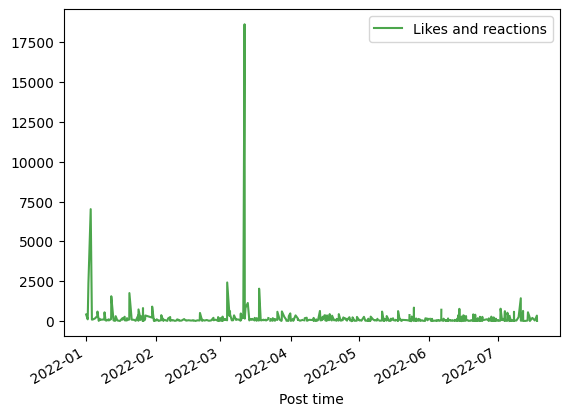

In [202]:
df.plot(kind='line', x='Post time', y='Reach')
df.plot(kind='line', x='Post time', y='Likes and reactions', color='green', alpha=0.7)
plt.show()

In [203]:
df.sort_values(by='Reach', ascending=False)

,Post time,Caption,Reach,Likes and reactions,Post Clicks,Comments,Shares,tags
398,2022-03-11 19:41:01,จุดแข็ง : ชอบพัฒนาตัวเอง สมัครเรียนไว้หลายคอร์...,455191.0,18624.0,17962.0,2033.0,2530.0,[]
543,2022-01-03 05:41:02,#ทำได้ใน1นาที คำนวณวันทำงานง่าย ๆ ไม่ต้องมานั่...,288256.0,7022.0,17206.0,74.0,2492.0,[]
382,2022-03-18 05:02:00,🔥 กลับมาอีกครั้งกับ UX UI Bootcamp รุ่น 3! ก้า...,245779.0,2030.0,17645.0,65.0,497.0,"[#uxdesign, #uidesign, #uxuidesignbootcamp, #u..."
227,2022-05-16 01:00:00,#น้ำมันแพง 😓 แตะ 40 บาทกันไปแล้วกับราคาน้ำมัน...,176268.0,172.0,1948.0,30.0,52.0,"[#upskillwithskooldio, #skooldio, #dataanalyti..."
416,2022-03-04 04:41:04,🎉 ฉลอง 5 ปี! #เรียนฟรีทุกคอร์สออนไลน์ 6 มี.ค. ...,169574.0,2420.0,7098.0,229.0,1363.0,"[#skooldioanniversary, #skooldio]"
...,...,...,...,...,...,...,...,...
372,2022-03-22 06:23:14,Skooldio Live : มนุษย์กลายพันธุ์ Ep.1 - เส้นทา...,1267.0,NaN,NaN,NaN,NaN,[]
209,2022-05-23 19:46:31,ถ้าอยากเป็น Data Scientist ต้องพัฒนาตัวเองยังไ...,998.0,1.0,7.0,0.0,0.0,[#upskillwithskooldio]
223,2022-05-17 22:31:50,"Be in Demand EP.2 : เปิดเส้นทางสายอาชีพ ""นักพั...",921.0,NaN,NaN,NaN,NaN,[]
200,2022-05-25 22:02:01,【 🔴 Live 】1 ทุ่มตรงวันนี้ มาเจาะลึกเบื้องหลังแ...,783.0,33.0,74.0,2.0,11.0,"[#skooldiolive, #becoming, #upskillwithskooldio]"


In [204]:
df.insert(loc=0, column='postID', value=range(1, len(df) + 1))
df = df.reset_index(drop=True)
df

,ID,Post time,Caption,Reach,Likes and reactions,Post Clicks,Comments,Shares,tags
0,1,2022-07-18 07:01:00,🎉 อัปเดททักษะผู้นำยุคใหม่ให้ทันทุกการเปลี่ยนแ...,1774.0,5.0,5.0,0.0,1.0,"[#digitalleadershipbootcamp, #dlb3, #dlbbyskoo..."
1,2,2022-07-18 05:17:04,👨‍⚖️ ออกแบบเว็บไซต์ยังไงให้ถูกต้องตามหลัก PDPA...,24510.0,341.0,1396.0,7.0,357.0,[]
2,3,2022-07-17 07:11:30,Google Sheets วิธีตรวจสอบ Email ที่ถูกต้องง่าย...,2559.0,35.0,160.0,0.0,15.0,[]
3,4,2022-07-16 05:34:02,🔵 🔴 🟡 🟢 #เรียนสายไหนมาก็อัปสกิลได้ เปลี่ยนคุณเ...,47897.0,198.0,1135.0,0.0,341.0,[]
4,5,2022-07-15 03:30:02,🧐 เฉลยเทคนิค! ซื้อคอร์ส Skooldio วันไหนคุ้มสุด...,2250.0,3.0,11.0,0.0,0.0,"[#lineshoppingth, #upskillwithskooldio]"
...,...,...,...,...,...,...,...,...,...
539,540,2022-01-03 18:27:00,🚀 #HarvardBusinessReview ปี 2022 ใครเรียนรู้เร...,35409.0,87.0,88.0,0.0,36.0,[#harvardbusinessreview]
540,541,2022-01-03 05:41:02,#ทำได้ใน1นาที คำนวณวันทำงานง่าย ๆ ไม่ต้องมานั่...,288256.0,7022.0,17206.0,74.0,2492.0,[]
541,542,2022-01-02 05:41:00,🎨 สาย Design ห้ามพลาด! แนะนำเว็บเลือกสีทำงานออ...,133251.0,2378.0,6283.0,66.0,1929.0,[]
542,543,2022-01-01 22:15:19,🌍 ในยุคที่หลายๆ องค์กรพยายามจะปรับตัวเองให้เป็...,44527.0,108.0,176.0,1.0,63.0,"[#skooldio, #sql, #dataanalytics]"


In [205]:
df.loc[df.isnull().any(axis=1)]['Caption']

28     Live ลอง Learning Ep.3 : เรียนฟรี AppSheet สร้...
57     Live ลอง Learning EP.2 : เรียนฟรี! Service Des...
88     Be in Demand EP.4 : เจาะลึกทักษะรอบด้านของงาน ...
122    Live ลอง Learning EP.1: สอนใช้ Airtable! Sprea...
159    Be in Demand EP.3 : เจาะลึกเส้นทางอาชีพ Perfor...
180    【  Live 】Skooldio x Google Developers - What’s...
210    Becoming EP.2: เจาะลึกเบื้องหลัง MAKE by KBank...
223    Be in Demand EP.2 : เปิดเส้นทางสายอาชีพ "นักพั...
245    สัมพลาดงาน EP.2 : สัมภาษณ์งานสาย Dev ยังไง ให้...
278    Becoming EP.1: เจาะลึกเบื้องหลัง ศรัทธา.Online...
340    สัมพลาดงาน EP.1 : น้อง ๆ จ๋า อย่าหาทำ (รวมข้อผ...
372    Skooldio Live : มนุษย์กลายพันธุ์ Ep.1 - เส้นทา...
492    What it takes to become a Senior Developer อยา...
Name: Caption, dtype: object